In [1]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') >= 0.96):   
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
import tensorflow as tf
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16, DenseNet169
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
#from classification_models.tfkeras import Classifiers
from datetime import datetime
%load_ext tensorboard

In [4]:
EPOCHS =30
INIT_LR = 0.0001
BS =32
default_image_size = tuple((50, 50))
image_size = 0
width=50
height=50
depth=3
train_dir=r"D:\DP\Ashish sec\Augmented C.B\ham"
#valid_dir=r"C:\Users\Glau\Desktop\DP\Pediastrum_cnn\Test"
train_folder=listdir(train_dir)
#valid_folder=listdir(valid_dir)

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
train_image_list, train_image_label=[],[]
for disease_folder in train_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{train_dir}/{disease_folder}")
    #print(disease_img_folder)
    for disease_img in disease_img_folder:
    #for disease_img in disease_img_folder[: : 2]:    
        image_directory = f"{train_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpeg") == True or image_directory.endswith(".jpg") == True or  image_directory.endswith(".png") == True:
            train_image_list.append(convert_image_to_array(image_directory))
            train_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing AC ...
processing CT ...
processing KAM ...
processing LYN ...
processing MIC ...
processing NOS ...
processing OS ...
processing PAM ...
processing PTE ...
processing SCY ...
[INFO] Image loading completed


In [7]:
label_binarizer = LabelBinarizer()
bin_train_image_labels = label_binarizer.fit_transform(train_image_label)
#bin_valid_image_labels = label_binarizer.fit_transform(valid_image_label)
pickle.dump(label_binarizer,open('Label_Instance_burn_labelHAM12.pk', 'wb'))
n_classes = len(label_binarizer.classes_)

In [8]:
np_train_image_list = np.array(train_image_list, dtype=np.float32) / 255.0

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer

In [33]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=8, input_shape=(50,50,3), kernel_size=(5,5), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
#AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))
#AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
#AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))

#4th Convolutional Layer
#AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))

#5th Convolutional Layer
#AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))
#AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
#AlexNet.add(Dense(512, input_shape=(32,32,3,)))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
#AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
#AlexNet.add(Dense(4096))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))
#Add Dropout
#AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
#AlexNet.add(Dense(10))
#AlexNet.add(BatchNormalization())
#AlexNet.add(Activation('relu'))
#Add Dropout
#AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 13, 13, 8)         608       
_________________________________________________________________
batch_normalization_25 (Batc (None, 13, 13, 8)         32        
_________________________________________________________________
activation_25 (Activation)   (None, 13, 13, 8)         0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                3930      
_________________________________________________________________
batch_normalization_26 (Batc (None, 10)               

In [34]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [35]:
AlexNet.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

print("[INFO] training network...")

[INFO] training network...


In [36]:
conf_matrix_list_of_arrays = []
#loss_per_fold = []
seed = 10   # for reproducibility you can change it. 
np.random.seed(seed)
roundlabel=[]
test=[]
idtest=[]
x_validate=[]
kfold = KFold(5, True, seed)
for train_idx, val_idx in kfold.split(np_train_image_list, y=bin_train_image_labels):
    #print('train: %s, val: %s' % (train_idx, val_idx))
    x_train, x_val = np_train_image_list[train_idx], np_train_image_list[val_idx]
    y_train, y_val= bin_train_image_labels[train_idx], bin_train_image_labels[val_idx]
    history=AlexNet.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  batch_size=BS,
                  epochs=EPOCHS, verbose=1        
                  )
    ycalculated = AlexNet.predict(x_val)
    yhat_classes =np.argmax(ycalculated,axis=1)
    rounded_labels=np.argmax(y_val,axis=1)                           
    conf_matrix = confusion_matrix(rounded_labels,yhat_classes)
    conf_matrix_list_of_arrays .append(conf_matrix)
    roundlabel.append(rounded_labels)
    test.append(yhat_classes)
    idtest.append(val_idx)
    
print('Score per fold')
for i in range(0, len(conf_matrix_list_of_arrays)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1}  - Accuracy: {conf_matrix_list_of_arrays[i]}%') 

Train on 14200 samples, validate on 3550 samples
Epoch 1/30
14200/14200 [==============================] - 3s 216us/step - loss: 2.1804 - accuracy: 0.2635 - val_loss: 1.9246 - val_accuracy: 0.3425
Epoch 2/30
14200/14200 [==============================] - 3s 185us/step - loss: 1.7925 - accuracy: 0.4262 - val_loss: 1.6927 - val_accuracy: 0.4656
Epoch 3/30
14200/14200 [==============================] - 3s 188us/step - loss: 1.6169 - accuracy: 0.4944 - val_loss: 1.5337 - val_accuracy: 0.5262
Epoch 4/30
14200/14200 [==============================] - 3s 187us/step - loss: 1.4866 - accuracy: 0.5493 - val_loss: 1.4205 - val_accuracy: 0.5738
Epoch 5/30
14200/14200 [==============================] - 3s 189us/step - loss: 1.3774 - accuracy: 0.5932 - val_loss: 1.3196 - val_accuracy: 0.6200
Epoch 6/30
14200/14200 [==============================] - 3s 187us/step - loss: 1.2905 - accuracy: 0.6327 - val_loss: 1.2416 - val_accuracy: 0.6634
Epoch 7/30
14200/14200 [==============================] - 3s 19

14200/14200 [==============================] - 3s 186us/step - loss: 0.4204 - accuracy: 0.8983 - val_loss: 0.3541 - val_accuracy: 0.9155
Epoch 26/30
14200/14200 [==============================] - 3s 187us/step - loss: 0.4163 - accuracy: 0.8994 - val_loss: 0.3647 - val_accuracy: 0.9118
Epoch 27/30
14200/14200 [==============================] - 3s 188us/step - loss: 0.4063 - accuracy: 0.9004 - val_loss: 0.3681 - val_accuracy: 0.9062
Epoch 28/30
14200/14200 [==============================] - 3s 185us/step - loss: 0.4013 - accuracy: 0.9042 - val_loss: 0.3612 - val_accuracy: 0.9141
Epoch 29/30
14200/14200 [==============================] - 3s 189us/step - loss: 0.3974 - accuracy: 0.9048 - val_loss: 0.3542 - val_accuracy: 0.9183
Epoch 30/30
14200/14200 [==============================] - 3s 189us/step - loss: 0.3946 - accuracy: 0.9068 - val_loss: 0.3514 - val_accuracy: 0.9138
Train on 14200 samples, validate on 3550 samples
Epoch 1/30
14200/14200 [==============================] - 3s 187us/st

14200/14200 [==============================] - 3s 187us/step - loss: 0.2723 - accuracy: 0.9322 - val_loss: 0.2131 - val_accuracy: 0.9462
Epoch 20/30
14200/14200 [==============================] - 3s 190us/step - loss: 0.2706 - accuracy: 0.9325 - val_loss: 0.2305 - val_accuracy: 0.9448
Epoch 21/30
14200/14200 [==============================] - 3s 189us/step - loss: 0.2707 - accuracy: 0.9316 - val_loss: 0.2192 - val_accuracy: 0.9451
Epoch 22/30
14200/14200 [==============================] - 3s 188us/step - loss: 0.2713 - accuracy: 0.9313 - val_loss: 0.2200 - val_accuracy: 0.9420
Epoch 23/30
14200/14200 [==============================] - 3s 191us/step - loss: 0.2653 - accuracy: 0.9342 - val_loss: 0.2187 - val_accuracy: 0.9459
Epoch 24/30
14200/14200 [==============================] - 3s 189us/step - loss: 0.2647 - accuracy: 0.9345 - val_loss: 0.2350 - val_accuracy: 0.9383
Epoch 25/30
14200/14200 [==============================] - 3s 185us/step - loss: 0.2612 - accuracy: 0.9371 - val_loss:

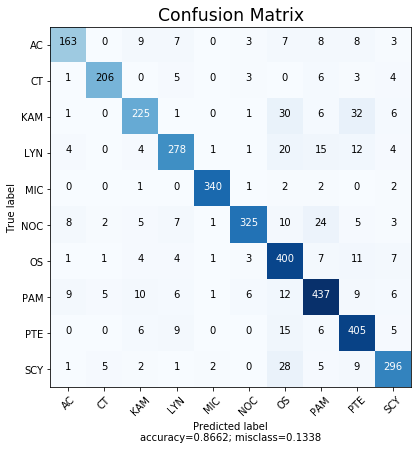

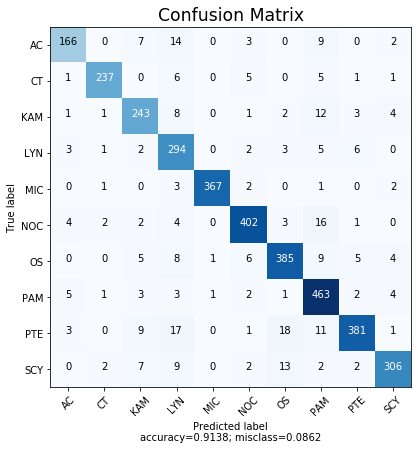

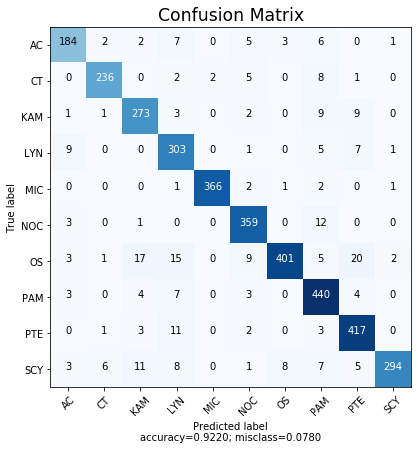

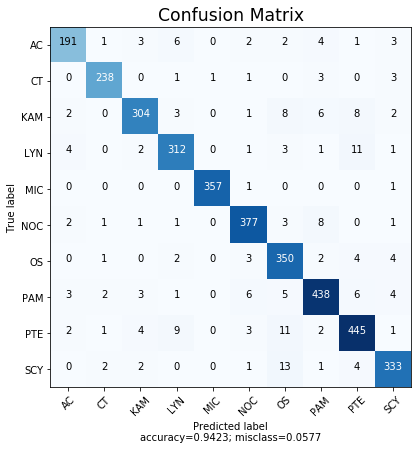

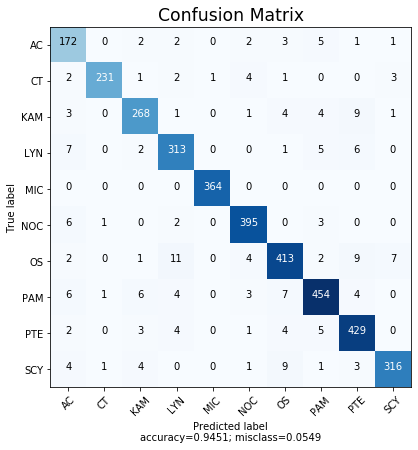

In [37]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'xx-large')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
for i in range(5):
    plot_confusion_matrix(conf_matrix_list_of_arrays[i], 
                      normalize = False,
                      target_names = ['AC', 'CT', 'KAM','LYN','MIC','NOC','OS','PAM','PTE','SCY'],
                      title        = "Confusion Matrix")

In [41]:
class_to_label_map={0:'AC',1: 'CT', 2:'KAM',3:'LYN',4:'MIC',5:'NOC',6:'OS',7:'PAM',8:'PTE',9:'SCY' }

C:\Users\Glau\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


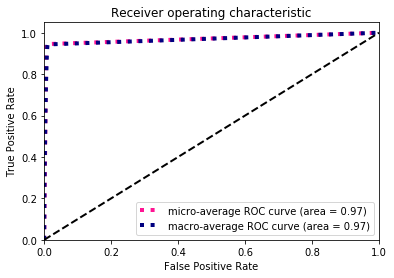

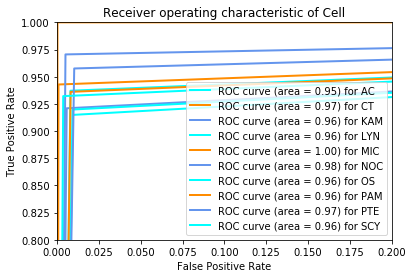

In [45]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes =10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
lb = LabelBinarizer()
lb.fit(rounded_labels)
y_test= lb.transform(rounded_labels)
snn_pred = lb.transform(yhat_classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)

for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw,color='white')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Cell')
plt.legend(loc="lower right")
plt.show()

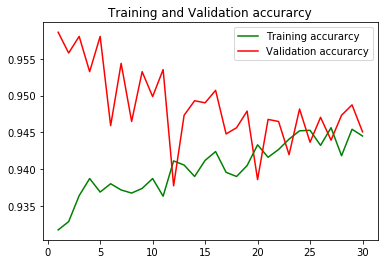

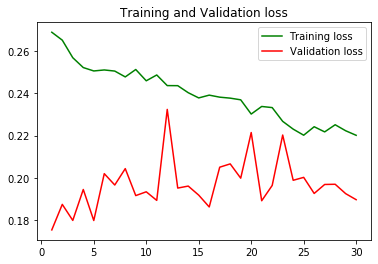

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()